In [1]:
#Librerias a utilizar
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.util import ngrams
from collections import Counter
import string
import re
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from nltk.corpus import stopwords

In [2]:
#Importar y agregar mas stopwords (indispensable)
stop_words = stopwords.words('spanish')
stop_words = stop_words + ['ademas', 'dijo', 'dijeron', 'comment', 'found', 'toda', 'veces', 'dieron', 'solo', 'tarde', 'noche']

In [3]:
def clean_text(text):
    if isinstance(text, float):
        return ""  # Devolver cadena vacía si el texto es un float
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Eliminar stopwords
    return text

# Nube de Palabras Secciones

In [4]:
#Funcion entrenada para generar los bigramas (nube de palabras y frecuencias)
#Se le entrega la base de datos ya sea de hotel, bares o restaurantes, y se pone la columna (el nombre) donde se encuentran los comentarios
#Se agrega tmb el nombre de la columna en donde esta la calificacion del comentario y el num_frecuencias indica que se grafican las 10 palabras mas frecuentes en el grafico de frecuencias
#El argumento max_words en wordcloud se puede configurar para mostrar mas o menos palabras

def generar_nube_bigramas(df, columna_comentarios, columna_calificacion, calificacion, num_frecuencias=10):
    # Filtrar el DataFrame por la calificación deseada
    df_filtrado = df[df[columna_calificacion] == calificacion]
    
    # Limpiar el texto
    comentarios_limpios = df_filtrado[columna_comentarios].apply(clean_text).tolist()
    
    # Tokenización de los comentarios
    tokenized_comments = [comment.split() for comment in comentarios_limpios]
    
    # Entrenamiento del modelo de bigramas
    bigram = Phrases(tokenized_comments, min_count=5, threshold=100)
    bigram_mod = Phraser(bigram)
    
    # Generación de bigramas
    bigram_comments = [bigram_mod[comment] for comment in tokenized_comments]
    
    # Unir los bigramas para contar las frecuencias
    bigramas = [' '.join(bigrama) for comentario in bigram_comments for bigrama in ngrams(comentario, 2)]
    
    # Contar frecuencia de bigramas
    bigramas_freq = Counter(bigramas)
    
    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', collocations=False, max_words=30).generate_from_frequencies(bigramas_freq)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    # Preparar datos para el gráfico de barras
    bigramas_comunes = bigramas_freq.most_common(num_frecuencias)
    bigramas, frecuencias = zip(*bigramas_comunes)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(12, 8))
    plt.barh(bigramas, frecuencias, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.title(f'Top {num_frecuencias} Bigramas más Comunes')
    plt.gca().invert_yaxis()
    plt.show()


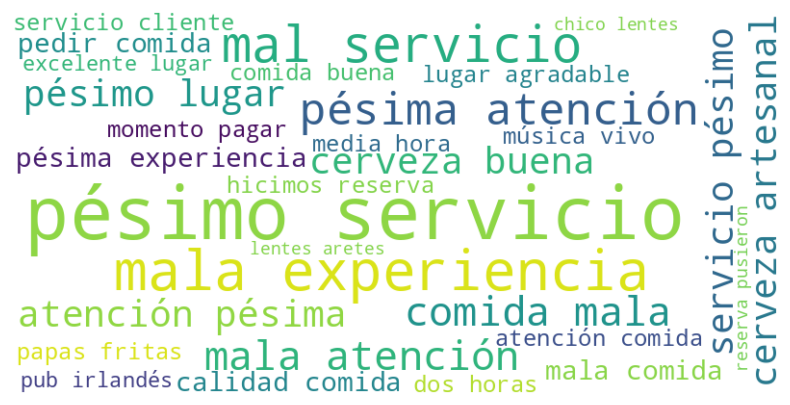

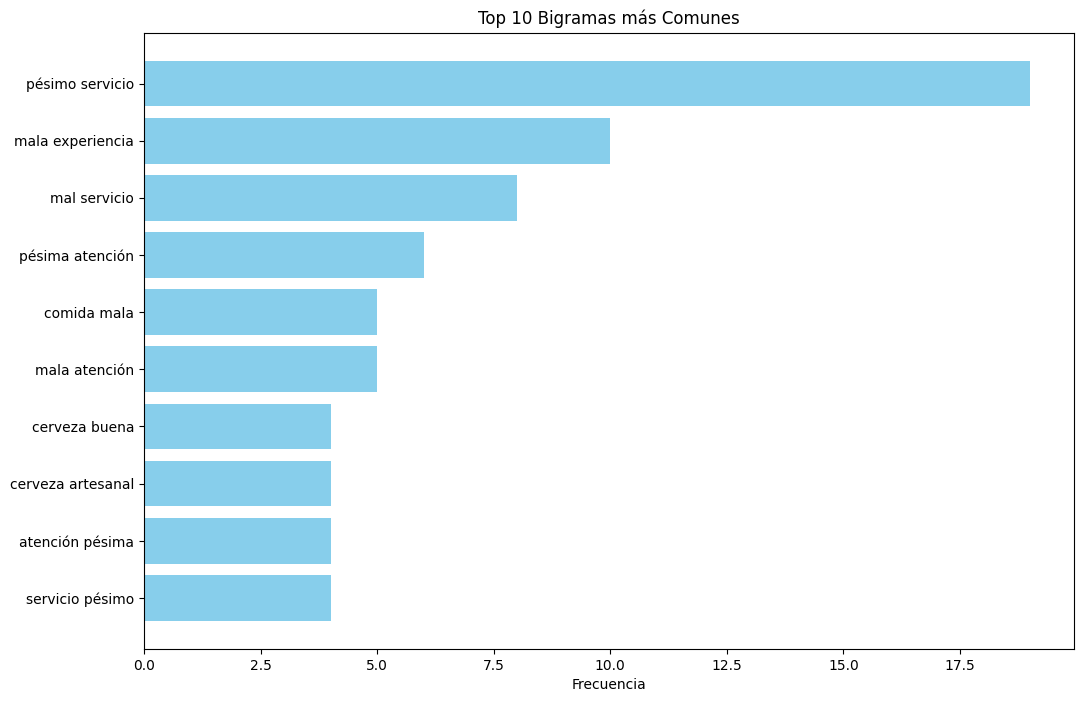

In [8]:
#Ejemplo de uso
datos = pd.read_csv('data/comentarios_bares.csv')
generar_nube_bigramas(datos, 'Comentario', 'Calificación', -1)

# Nube de Palabras Empresas

In [10]:
#La misma idea del anterior, solo que ahora se debe especificar la columna del dt donde este el nombre que queremos filtrar

def generar_nube_bigramas(df, columna_comentarios, columna_calificacion, calificacion, columna_nombre, nombre, num_frecuencias=10):
    # Filtrar el DataFrame por la calificación deseada y por el nombre de la empresa
    df_filtrado = df[(df[columna_calificacion] == calificacion) & (df[columna_nombre] == nombre)]
    
    # Limpiar el texto
    comentarios_limpios = df_filtrado[columna_comentarios].apply(clean_text).tolist()
    
    # Tokenización de los comentarios
    tokenized_comments = [comment.split() for comment in comentarios_limpios]
    
    # Entrenamiento del modelo de bigramas
    bigram = Phrases(tokenized_comments, min_count=5, threshold=100)
    bigram_mod = Phraser(bigram)
    
    # Generación de bigramas
    bigram_comments = [bigram_mod[comment] for comment in tokenized_comments]
    
    # Unir los bigramas para contar las frecuencias
    bigramas = [' '.join(bigrama) for comentario in bigram_comments for bigrama in ngrams(comentario, 2)]
    
    # Contar frecuencia de bigramas
    bigramas_freq = Counter(bigramas)
    
    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', collocations=False, max_words=30).generate_from_frequencies(bigramas_freq)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    # Preparar datos para el gráfico de barras
    bigramas_comunes = bigramas_freq.most_common(num_frecuencias)
    bigramas, frecuencias = zip(*bigramas_comunes)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(12, 8))
    plt.barh(bigramas, frecuencias, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.title(f'Top {num_frecuencias} Bigramas más Comunes para {nombre}')
    plt.gca().invert_yaxis()
    plt.show()
    
datos = pd.read_csv('data/comentarios.csv')
generar_nube_bigramas(datos, 'Comentario', 'Calificación', -1, 'Nombre', 'PLAY House Quito')

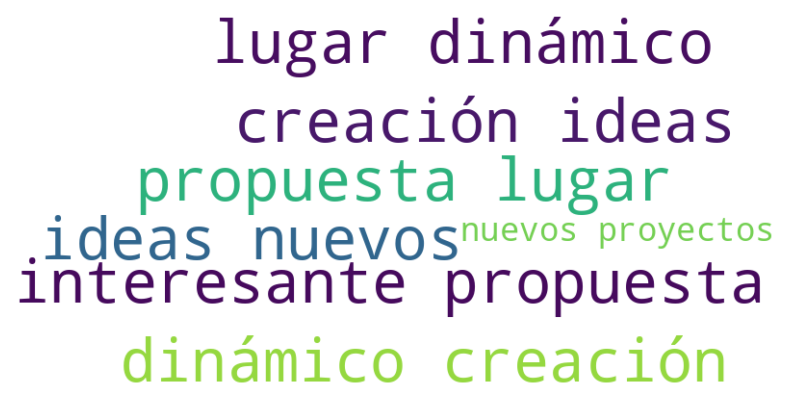

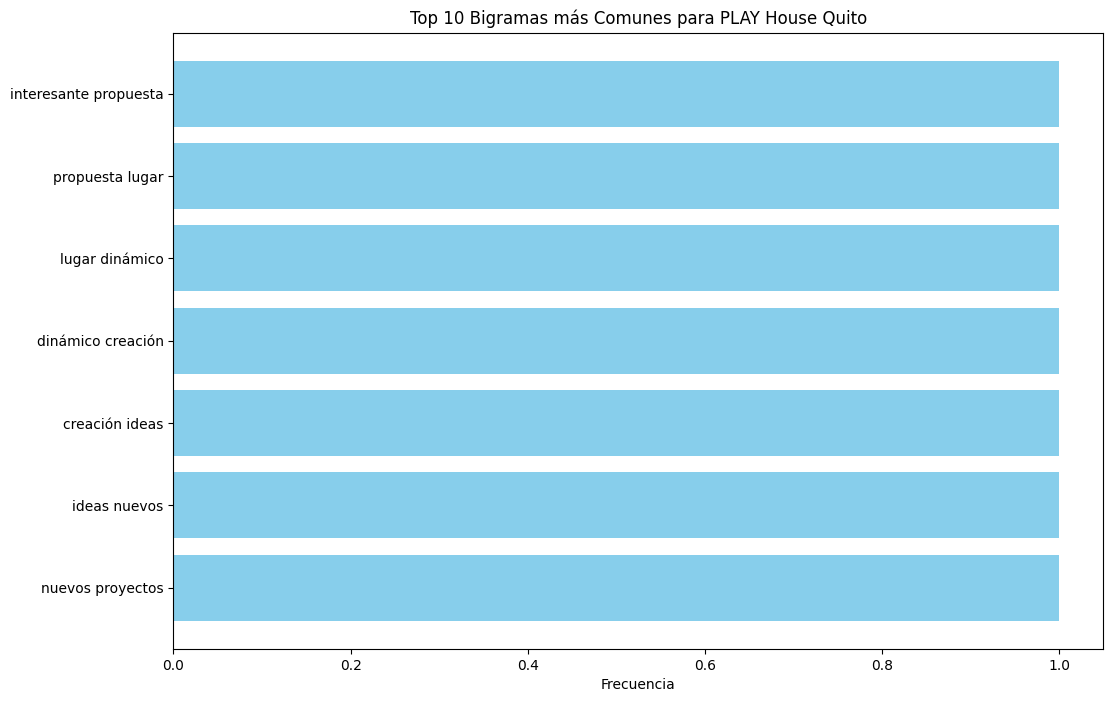